In [1]:
# Loading necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading the dataset
dataset = pd.read_csv("shipping.csv")

In [3]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
# Using train test split to spliting the dataset into sample testing and training the model
from sklearn.model_selection import train_test_split

In [5]:
# X which contains Independent Feature
x = dataset.loc[:,dataset.columns != 'Reached.on.Time_Y.N']

In [6]:
x.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233
1,2,F,Flight,4,5,216,2,low,M,59,3088
2,3,A,Flight,2,2,183,4,low,M,48,3374
3,4,B,Flight,3,3,176,4,medium,M,10,1177
4,5,C,Flight,2,2,184,3,medium,F,46,2484


In [7]:
# Dependent Features
y = dataset['Reached.on.Time_Y.N']

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7699 entries, 9957 to 7270
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   7699 non-null   int64 
 1   Warehouse_block      7699 non-null   object
 2   Mode_of_Shipment     7699 non-null   object
 3   Customer_care_calls  7699 non-null   int64 
 4   Customer_rating      7699 non-null   int64 
 5   Cost_of_the_Product  7699 non-null   int64 
 6   Prior_purchases      7699 non-null   int64 
 7   Product_importance   7699 non-null   object
 8   Gender               7699 non-null   object
 9   Discount_offered     7699 non-null   int64 
 10  Weight_in_gms        7699 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 721.8+ KB


In [11]:
y_train.describe()

count    7699.000000
mean        0.594233
std         0.491072
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Reached.on.Time_Y.N, dtype: float64

In [15]:
from statsmodels.stats.weightstats import ztest

In [22]:
z_test, pvalue = ztest(x["Cost_of_the_Product"], y)

In [23]:
z_test

457.3326713621939

In [25]:
pvalue

0.0

In [26]:
alpha = 0.05

if(pvalue < alpha):
    print("Reject Null Hypothesis")
else:
    print("Reject Alternate Hypothesis")

Reject Null Hypothesis


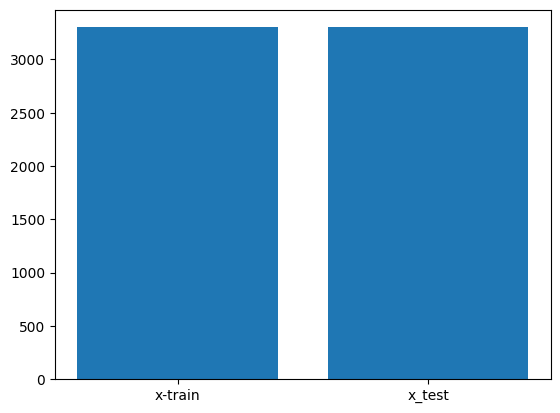

In [12]:
x_train_prop = len(x_train)/ len(x_train) + len(x_test)
x_test_prop = len(x_test) / len(x_train) + len(x_test)
plt.bar(["x-train","x_test"], [x_train_prop, x_test_prop])
plt.show()